# 9 Pandas分组与聚合

# 设置索引

In [1]:
import pandas as pd
import numpy as np

In [2]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [3]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
# a.columns=list('ABCD')  #a的列名变了，a.columns更换列名
print('-'*50)
print(a)

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
--------------------------------------------------
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o


In [4]:
c.values.shape

(7, 4)

In [5]:
#让某些列变为索引，让c列，d列数据变为索引
print(a)
print('-'*50)
a.set_index(['c'],inplace=True)#a没变，返回修改后的df
a

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
--------------------------------------------------


,a,b,d
c,,,
one,0,7,h
one,1,6,j
one,2,5,k
two,3,4,l
two,4,3,m
two,5,2,n
two,6,1,o


In [6]:
a.columns

Index(['a', 'b', 'd'], dtype='object')

In [7]:
a.index

Index(['one', 'one', 'one', 'two', 'two', 'two', 'two'], dtype='object', name='c')

### 时间序列

In [8]:
pd.date_range(start="20190101", end="20190201")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [9]:
pd.date_range(start="20250107",periods=10,freq='B')

DatetimeIndex(['2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20'],
              dtype='datetime64[ns]', freq='B')

In [10]:
pd.date_range(start="20190101",periods=10,freq='ME')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [11]:
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [12]:
pd.date_range(start="20230710",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17'],
              dtype='datetime64[ns]', freq='W-SUN')

In [13]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 5)
s

0     3/11/2000
1     3/12/2000
2     3/13/2000
3     3/11/2000
4     3/12/2000
5     3/13/2000
6     3/11/2000
7     3/12/2000
8     3/13/2000
9     3/11/2000
10    3/12/2000
11    3/13/2000
12    3/11/2000
13    3/12/2000
14    3/13/2000
dtype: object

In [14]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
pd.to_datetime(s)

0    2000-03-11
1    2000-03-12
2    2000-03-13
3    2000-03-11
4    2000-03-12
5    2000-03-13
6    2000-03-11
7    2000-03-12
8    2000-03-13
9    2000-03-11
10   2000-03-12
11   2000-03-13
12   2000-03-11
13   2000-03-12
14   2000-03-13
dtype: datetime64[ns]

In [15]:
#实战美国911数据
from matplotlib import pyplot as plt

# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist() #二维列表
cate_list = [i[0] for i in temp_list] #i[0]就是EMS  Fire  Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
 #添加一列
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))

df.set_index("timeStamp", inplace=True) #设置索引，时间戳，inplace=True表示在原df上修改

df.head(10)  #查看前10行

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


C:\Windows\Temp\ipykernel_8688\3777774160.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  count_by_month = group_data.resample("M").count()["title"]  #降采样


timeStamp
2015-12-31    3898
2016-01-31    6063
2016-02-29    5413
2016-03-31    5832
2016-04-30    5684
2016-05-31    5730
2016-06-30    5720
2016-07-31    6029
2016-08-31    6005
2016-09-30    5750
2016-10-31    6039
2016-11-30    5838
2016-12-31    6024
2017-01-31    6082
2017-02-28    5417
2017-03-31    5913
2017-04-30    5780
2017-05-31    5948
2017-06-30    6030
2017-07-31    5974
2017-08-31    5882
2017-09-30    3789
Freq: ME, Name: title, dtype: int64
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', name='timeStamp', freq='ME')
timeStamp
2015-12-31    1095
2016-01-31    1904
2016-02-29    1868
201

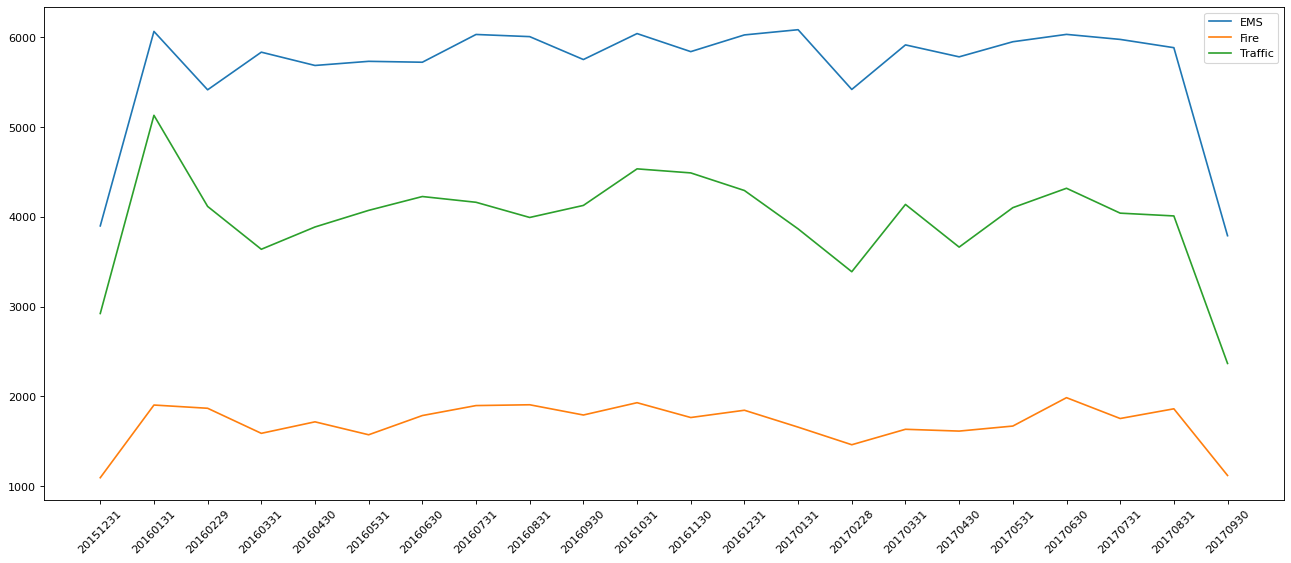

In [16]:
plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
#resample降采样，按月统计,索引必须是时间类型，类似groupby
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]  #降采样
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values #values是对应事故发生次数

    _x = [i.strftime("%Y%m%d") for i in _x]  #变年月日格式

    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

### 分组运算

In [17]:
import numpy as np
#分组后给名称加前缀
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)
print('-'*50)
# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').mean().add_prefix('mean_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      5      8
1    b    one      4      7
2    a    two      4      1
3    b  three      7      5
4    a    two      1      3
5    b    two      6      6
6    a    one      6      3
7    a  three      1      1
--------------------------------------------------


TypeError: agg function failed [how->mean,dtype->object]

In [53]:
# 方法2，使用transform，分组后计算结果和原本的df保持一致
k1_sum_tf = df_obj.groupby('key1').transform(np.mean).add_prefix('mean_')
k1_sum_tf
# df_obj[k1_sum_tf.columns] = k1_sum_tf
# print(df_obj)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9064\3846908578.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  k1_sum_tf = df_obj.groupby('key1').transform(np.mean).add_prefix('mean_')


,mean_data1,mean_data2
0,6.000000,3.600000
1,5.333333,5.666667
2,6.000000,3.600000
3,5.333333,5.666667
4,6.000000,3.600000
5,5.333333,5.666667
6,6.000000,3.600000
7,6.000000,3.600000


In [ ]:
df_obj.groupby('key1').mean()

In [ ]:
df_obj

In [ ]:
del df_obj['key2']

In [ ]:
df_obj.groupby('key1').transform(np.mean)

In [54]:
#实现a组和b组，谁比平均分高，谁比平均分低
def diff_mean(s):
    """
        返回数据与均值的差值，s传入的是某一个分组
    """
    return s - s.mean()

print(df_obj.groupby('key1').transform(diff_mean))

      data1     data2
0  2.000000  2.400000
1  1.666667  1.333333
2 -1.000000  0.400000
3 -4.333333  3.333333
4  2.000000 -1.600000
5  2.666667 -4.666667
6 -1.000000 -2.600000
7 -2.000000  1.400000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9064\172458501.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  print(df_obj.groupby('key1').transform(diff_mean))
